## Mission 1. Netflix and Code

### Mandatory Part
---

넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

- **한국 작품**은 총 얼마나 있는가?
    - country column을 기준으로 함
    - "South Korea"인 경우만 인정 ("US, South Korea"는 인정 하지 않음)

In [149]:
import numpy as np
import pandas as pd

In [97]:
netflix = pd.read_csv("netflix_titles.csv")

nf_korea = netflix[netflix['country'] == 'South Korea']
# Shouth Korea인 경우만을 뽑아서 열의 길이를 구함
len(nf_korea)

183

In [115]:
#country 중에 South Korea인 경우를 count()를 이용해 구함
netflix['country'][netflix['country']=='South Korea'].count()

183

### Bonus Part
---

넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다.
    - **단일 국가**인 경우를 기준으로 결과를 구해보자.

In [133]:
# country column을 기준으로 '단일국가'끼리 묶어 count
nf = netflix.groupby(by=netflix['country']).count()
# count된 것에서 최대치인 것을 구함
nf_max = nf[nf['title'] == nf['title'].max()]

nf_max

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
country,,,,,,,,,,,
United States,2555,2555,2555,1838,2251,2549,2555,2552,2555,2555,2555


In [146]:
nf_x = netflix.groupby(by=netflix['country']).count().sort_values('title', ascending=False)
# 최대치인 국가와 show_id만 출력
nf_x.iloc[:1,:1]

,show_id
country,
United States,2555


---
---

## Mission 2. 가즈아!

Moving Average(이동평균법)

### Mandatory Part
---

다음 데이터(BitCoin.csv)가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

- 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.  

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [151]:
import matplotlib.pyplot as plt

%matplotlib inline

In [152]:
bitcoin = pd.read_csv("./BitCoin.csv")

In [195]:
import datetime

bc_df = pd.DataFrame({'Date': bitcoin['Date'], 'OpenPrice': bitcoin['Open']})

bc_df['Date'] = pd.to_datetime(bc_df['Date'])
# Date를 기준으로 2016.6 ~ 2017.6 기간의 정보를 정렬
bc_df = bc_df[(bc_df['Date'] >= datetime.datetime(2016, 6, 1)) & (bc_df['Date'] <= datetime.datetime(2017, 6, 30))].sort_values('Date')
# 5-MA rolling 5 / mean
bc_df['5-MA'] = bc_df.rolling(5).mean()

bc_df

,Date,OpenPrice,5-MA
625,2016-06-01,431.86,NaN
594,2016-06-02,386.59,NaN
565,2016-06-03,400.52,NaN
534,2016-06-04,424.28,NaN
504,2016-06-05,447.94,418.238
...,...,...,...
88,2017-06-26,2590.57,2666.942
87,2017-06-27,2478.45,2624.426
86,2017-06-28,2553.03,2593.564
85,2017-06-29,2567.56,2559.372


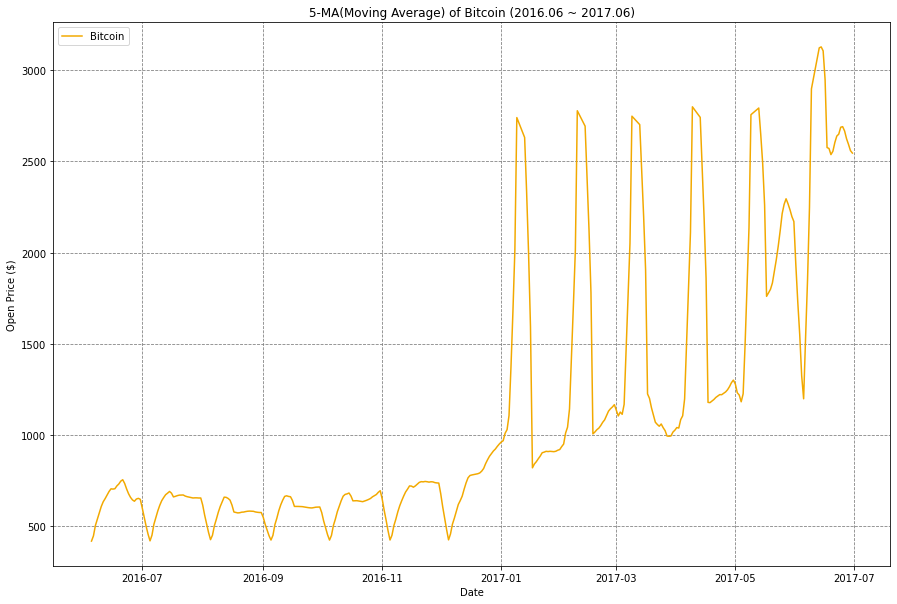

In [196]:
plt.figure(figsize=(15, 10))
plt.plot(bc_df['Date'], bc_df['5-MA'], color='#f2a900', label='Bitcoin')
plt.grid(True, axis='both', color='gray', linestyle='--') # linesytle -- (dashed)
plt.legend(loc='upper left')
plt.title('5-MA(Moving Average) of Bitcoin (2016.06 ~ 2017.06)')
plt.xlabel('Date')
plt.ylabel('Open Price ($)')

plt.show()

### Bonus Part
---

위에 주어진 데이터(ETH_day.csv)와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [197]:
ethereum = pd.read_csv("./ETH_day.csv")

In [200]:
er_df = pd.DataFrame({'Date': ethereum['Date'], 'OpenPrice': ethereum['Open']})

er_df['Date'] = pd.to_datetime(er_df['Date'])
# Date를 기준으로 2016.6 ~ 2017.6 기간의 정보를 정렬
er_df = er_df[(er_df['Date'] >= datetime.datetime(2016, 6, 1)) & (er_df['Date'] <= datetime.datetime(2017, 6, 30))].sort_values('Date')
# 5-MA rolling 5 / mean
er_df['5-MA'] = er_df.rolling(5).mean()

er_df

,Date,OpenPrice,5-MA
1414,2016-06-01,14.18,NaN
1413,2016-06-02,13.95,NaN
1412,2016-06-03,13.90,NaN
1411,2016-06-04,14.02,NaN
1410,2016-06-05,13.86,13.982
...,...,...,...
1024,2017-06-26,278.73,310.850
1023,2017-06-27,253.00,296.592
1022,2017-06-28,286.21,289.898
1021,2017-06-29,317.59,288.066


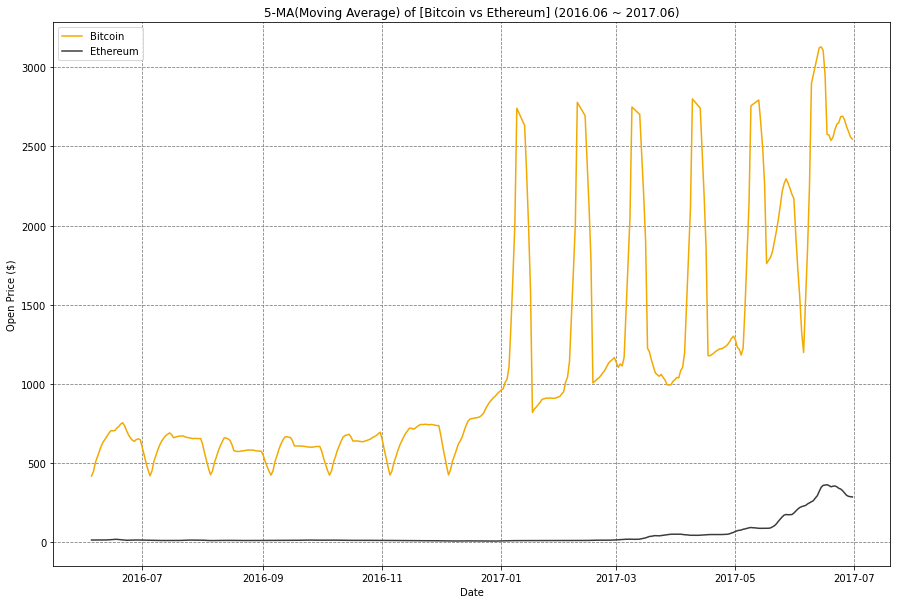

In [201]:
plt.figure(figsize=(15, 10))

plt.plot(bc_df['Date'], bc_df['5-MA'], color='#f2a900', label='Bitcoin')
plt.plot(er_df['Date'], er_df['5-MA'], color='#3c3c3d', label='Ethereum')

plt.grid(True, axis='both', color='gray', linestyle='--') # linesytle -- (dashed)

plt.legend(loc='upper left')
plt.title('5-MA(Moving Average) of [Bitcoin vs Ethereum] (2016.06 ~ 2017.06)')
plt.xlabel('Date')
plt.ylabel('Open Price ($)')

plt.show()